# Transformation of Features¶

In [26]:
'''Types Of Transformation-
Normalization And Standardization
Scaling to Minimum And Maximum values
Scaling To Median And Quantiles
Guassian Transformation
Logarithmic Transformation
Reciprocal Trnasformation
Square Root Transformation
Exponential Trnasformation
Box Cox Transformation'''

'Types Of Transformation-\nNormalization And Standardization\nScaling to Minimum And Maximum values\nScaling To Median And Quantiles\nGuassian Transformation\nLogarithmic Transformation\nReciprocal Trnasformation\nSquare Root Transformation\nExponential Trnasformation\nBox Cox Transformation'

# Standardization(Why standardization?)
'''Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).
We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std
In [1]:'''

In [27]:
import pandas as pd
df=pd.read_csv('titanic_train.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

Survived  Pclass   Age     Fare
0         0       3  22.0   7.2500
1         1       1  38.0  71.2833
2         1       3  26.0   7.9250
3         1       1  35.0  53.1000
4         0       3  35.0   8.0500

In [28]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [29]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [30]:
### Independent and dependent features
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [31]:
X

Pclass   Age     Fare
0         3  22.0   7.2500
1         1  38.0  71.2833
2         3  26.0   7.9250
3         1  35.0  53.1000
4         3  35.0   8.0500
..      ...   ...      ...
886       2  27.0  13.0000
887       1  19.0  30.0000
888       3  28.0  23.4500
889       1  26.0  30.0000
890       3  32.0   7.7500

[891 rows x 3 columns]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
X_train

Pclass   Age      Fare
6         1  54.0   51.8625
718       3  28.0   15.5000
685       2  25.0   41.5792
73        3  26.0   14.4542
882       3  22.0   10.5167
..      ...   ...       ...
106       3  21.0    7.6500
270       1  28.0   31.0000
860       3  41.0   14.1083
435       1  14.0  120.0000
102       1  21.0   77.2875

[596 rows x 3 columns]

In [34]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()
### fit vs fit_transform
X_train_scaled=scaler.fit_transform(X_train)

In [36]:
X_train_scaled

array([[-1.62580285,  1.91349292,  0.38784185],
       [ 0.80576177, -0.09452019, -0.31908053],
       [-0.41002054, -0.32621401,  0.18792449],
       ...,
       [ 0.80576177,  0.90948636, -0.34613654],
       [-1.62580285, -1.17575802,  1.71250117],
       [-1.62580285, -0.63513911,  0.8821286 ]])

In [37]:
X_test_scaled=scaler.transform(X_test)

In [38]:
X_test_scaled

array([[ 0.80576177, -0.09452019, -0.32402243],
       [-0.41002054,  0.13717363, -0.4162854 ],
       [ 0.80576177, -0.71237038, -0.46634591],
       [-0.41002054, -1.79360821,  0.0211365 ],
       [ 0.80576177, -1.17575802, -0.40186603],
       [-1.62580285, -0.24898274,  0.91250512],
       [ 0.80576177, -0.09452019, -0.46974808],
       [ 0.80576177, -1.02129548, -0.2704781 ],
       [ 0.80576177, -1.02129548, -0.46974808],
       [-1.62580285, -0.78960166, -0.10944269],
       [-1.62580285,  0.60056127,  0.41190006],
       [ 0.80576177,  1.14118018, -0.46391578],
       [ 0.80576177, -0.09452019, -0.12531819],
       [ 0.80576177,  0.05994235, -0.47995459],
       [-0.41002054,  0.52332999, -0.36768297],
       [-1.62580285, -1.02129548,  0.14555873],
       [-1.62580285,  0.98671764,  0.40128918],
       [ 0.80576177, -0.09452019, -0.46820835],
       [-0.41002054, -0.17175147, -0.36768297],
       [-1.62580285,  1.372874  ,  0.39051499],
       [ 0.80576177, -0.40344529, -0.466

In [39]:
### Model Building
## fit() for training and predict for test

In [40]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()

In [41]:
classification.fit(X_train_scaled,y_train)

LogisticRegression()

In [42]:
classification.predict(X_test_scaled)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])

# Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(X_train))
df_minmax.head()

0         1         2
0  0.0  0.673285  0.101229
1  1.0  0.346569  0.030254
2  0.5  0.308872  0.081157
3  1.0  0.321438  0.028213
4  1.0  0.271174  0.020527

<IPython.core.display.Javascript object>

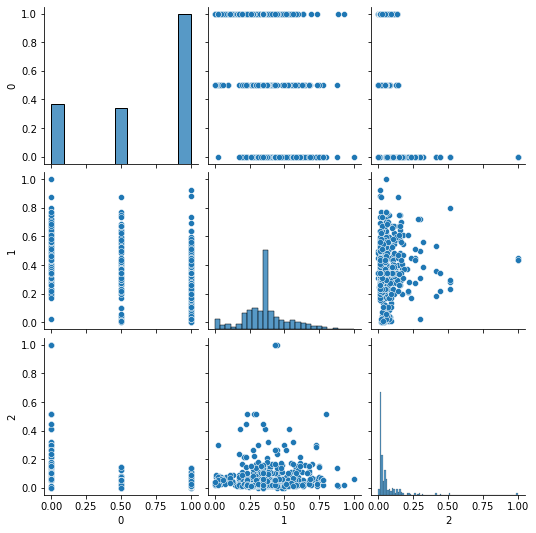

In [45]:
sns.pairplot(df_minmax)

# Robust Scaler¶


'''Robust Scaler are robust to outliers.It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:
IQR = 75th quantile - 25th quantile
X_scaled = (X - X.median) / IQR
0,1,2,3,4,5,6,7,8,9,10
9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%'''

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(X_train))
df_robust_scaler.head()

0         1         2
0 -2.0  2.000000  1.602069
1  0.0  0.000000  0.044788
2 -1.0 -0.230769  1.161670
3  0.0 -0.153846  0.000000
4  0.0 -0.461538 -0.168630

In [51]:
scaler.transform(X_test)

array([[ 0.00000000e+00,  0.00000000e+00,  3.39014989e-02],
       [-1.00000000e+00,  2.30769231e-01, -1.69344754e-01],
       [ 0.00000000e+00, -6.15384615e-01, -2.79623126e-01],
       [-1.00000000e+00, -1.69230769e+00,  7.94252677e-01],
       [ 0.00000000e+00, -1.07692308e+00, -1.37580300e-01],
       [-2.00000000e+00, -1.53846154e-01,  2.75785011e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.87117773e-01],
       [ 0.00000000e+00, -9.23076923e-01,  1.51854390e-01],
       [ 0.00000000e+00, -9.23076923e-01, -2.87117773e-01],
       [-2.00000000e+00, -6.92307692e-01,  5.06599572e-01],
       [-2.00000000e+00,  6.92307692e-01,  1.65506638e+00],
       [ 0.00000000e+00,  1.23076923e+00, -2.74269807e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.71627409e-01],
       [ 0.00000000e+00,  1.53846154e-01, -3.09601713e-01],
       [-1.00000000e+00,  6.15384615e-01, -6.22783726e-02],
       [-2.00000000e+00, -9.23076923e-01,  1.06834261e+00],
       [-2.00000000e+00,  1.07692308e+00

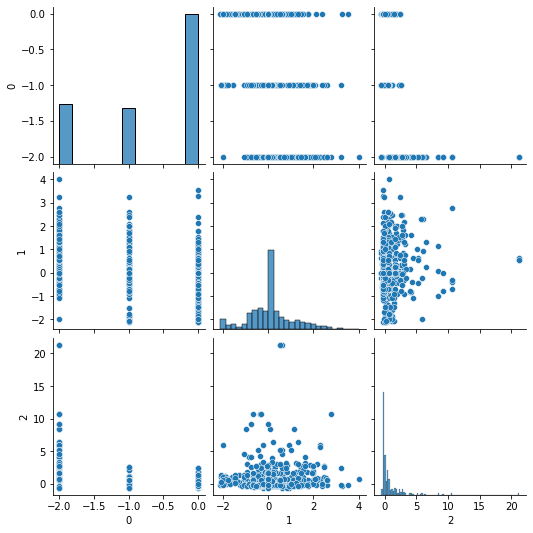

In [52]:
import seaborn as sns
sns.pairplot(df_robust_scaler)

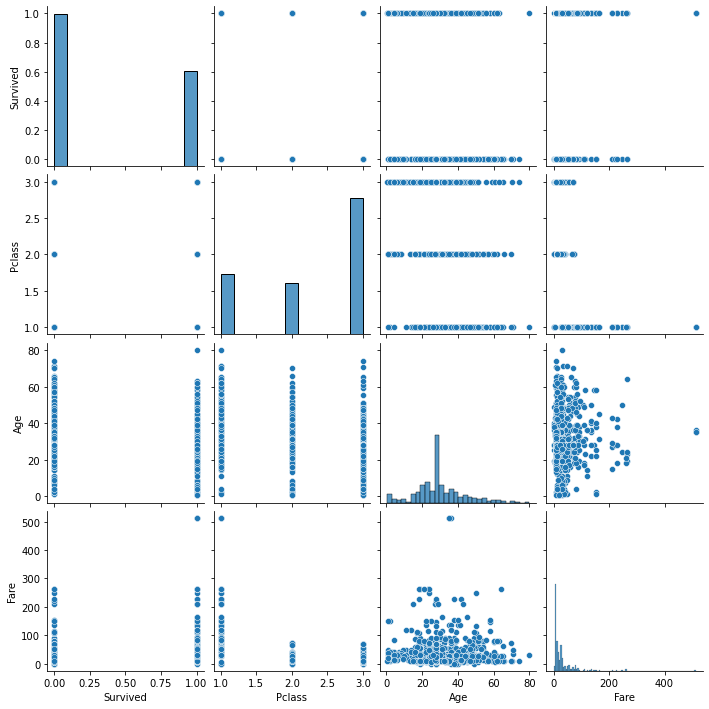

In [53]:
import seaborn as sns
sns.pairplot(df)

# Guassian Transformation¶


'''Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance
logarithmic transformation
reciprocal transformation
square root transformation
exponential transformation (more general, you can use any exponent)
boxcox transformation'''

In [55]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [56]:
### fillnan
df['Age']=df['Age'].fillna(df['Age'].median())

In [57]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [58]:
import matplotlib.pyplot as plt

In [59]:
import scipy.stats as stat
import pylab

In [60]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

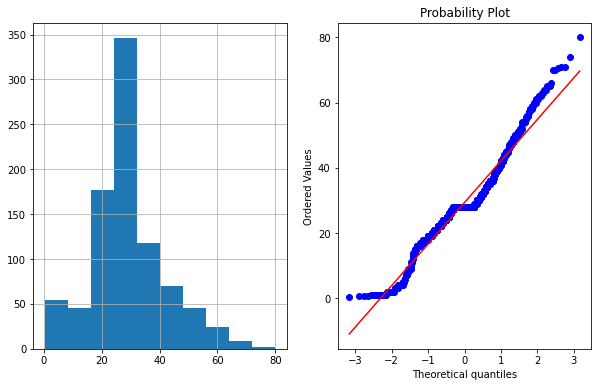

In [61]:
plot_data(df,'Age')

# Logarithmic Transformation¶


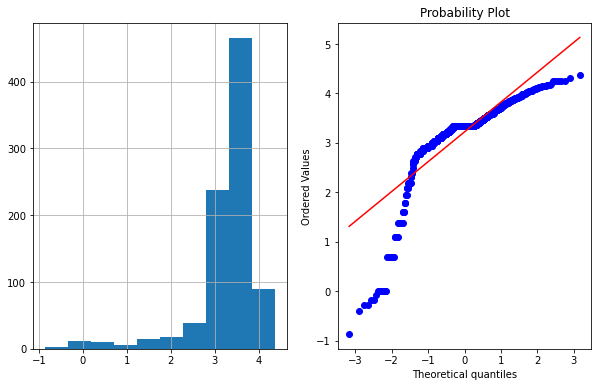

In [62]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

# Reciprocal Trnasformation¶


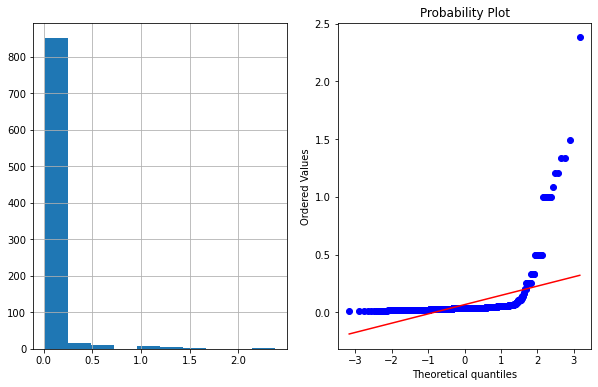

In [63]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

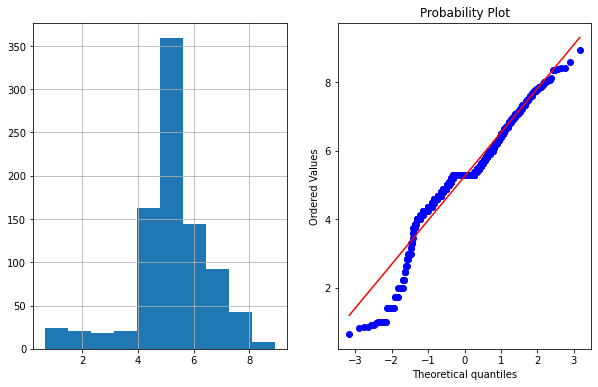

In [64]:
##### Square Root Transformation
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

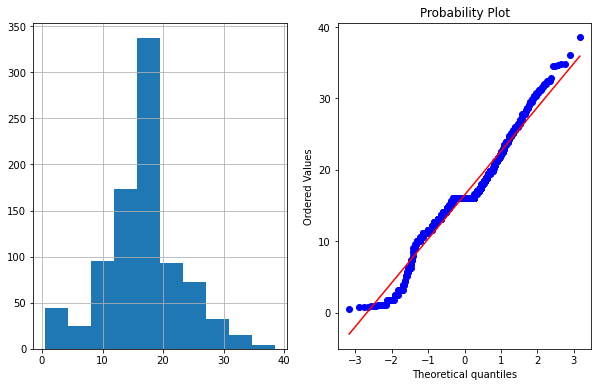

In [65]:
#### Exponential Transdormation
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

# BoxCOx Transformation

'''The Box-Cox transformation is defined as:
T(Y)=(Y exp(λ)−1)/λ
where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.'''

In [66]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [67]:
print(parameters)

0.7964531473656952


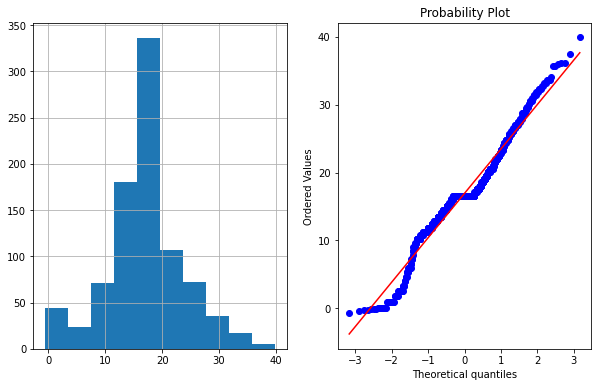

In [68]:
plot_data(df,'Age_Boxcox')

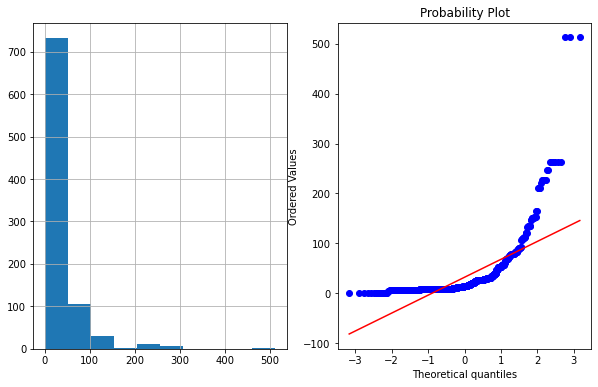

In [69]:
plot_data(df,'Fare')

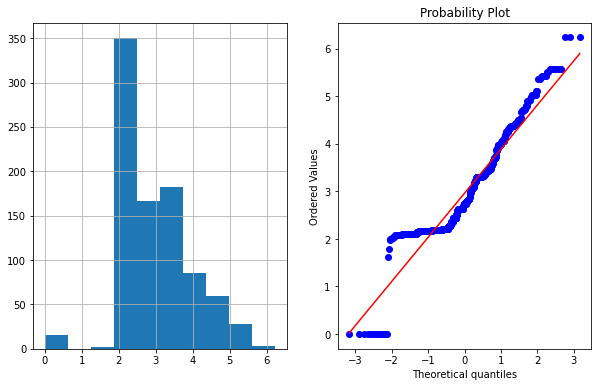

In [70]:
#### Fare
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

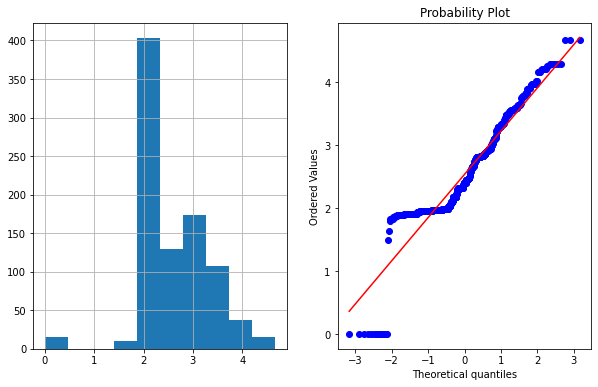

In [71]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_Boxcox')